 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [630]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [631]:
# Reading whale returns
whale_data = pd.read_csv(Path('../Resources/whale_returns.csv'))
whale_data.set_index(pd.to_datetime(whale_data['Date'], infer_datetime_format=True), inplace=True)
whale_data.sort_index(inplace=True)
whale_data.drop(columns='Date', inplace=True)
whale_data.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [632]:
# Count nulls
print('This shows the number of missing data in each column')
print(whale_data.isna().sum())

print('This is the total number of missing data points in the entire dataframe')
total_missing = whale_data.isna().sum().sum()
print(total_missing)



This shows the number of missing data in each column
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
This is the total number of missing data points in the entire dataframe
4


In [633]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [634]:
# Reading algorithmic returns
algo_returns = pd.read_csv(Path('../Resources/algo_returns.csv'))
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.sort_index(inplace=True)
algo_returns.drop(columns='Date',  inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [635]:
# Count nulls
print('This shows the number of missing data in each column')
print(algo_returns.isna().sum())

print('This is the total number of missing data points in the entire dataframe')
total_missing = algo_returns.isna().sum().sum()
print(total_missing)


This shows the number of missing data in each column
Algo 1    0
Algo 2    6
dtype: int64
This is the total number of missing data points in the entire dataframe
6


In [636]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [637]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(Path('../Resources/sp500_history.csv'))
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.sort_index(inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [638]:
# Check Data Types
sp500_df.dtypes


Close    object
dtype: object

In [639]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.strip('$').astype('float')
sp500_df.head()




,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [640]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change().dropna()
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [641]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [642]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.rename(columns ={'Close': 'sp500 Return'}, inplace=True)
daily_returns.head()


,sp500 Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [643]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_data, algo_returns, daily_returns], axis=1, join = 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Comparing whale portfolios with sp500 returns'}, xlabel='Date'>

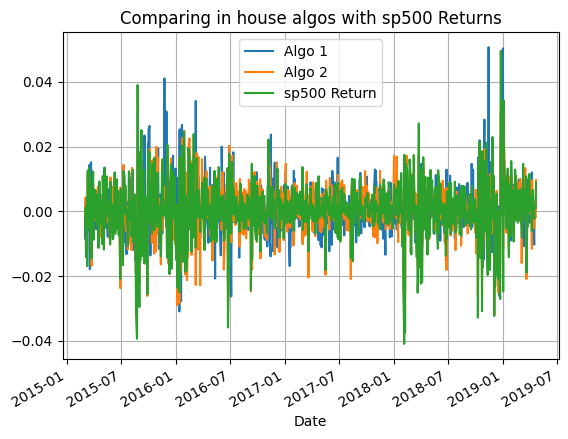

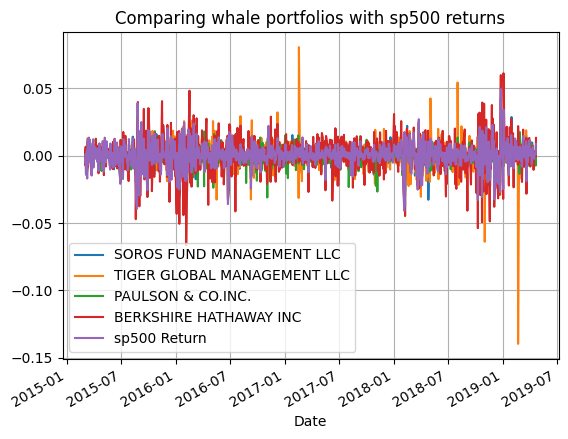

In [644]:
# Plot daily returns of all portfolios
combined_df.plot(y=['Algo 1', 'Algo 2', 'sp500 Return'],
                grid=True,
                title='Comparing in house algos with sp500 Returns')
combined_df.plot(y=['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC','PAULSON & CO.INC. ',
                     'BERKSHIRE HATHAWAY INC', 'sp500 Return' ],
                    grid=True, 
                    title='Comparing whale portfolios with sp500 returns')



#### Calculate and Plot cumulative returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


<Axes: title={'center': 'Cumulative Returns of Different Investment Portfolios'}, xlabel='Date'>

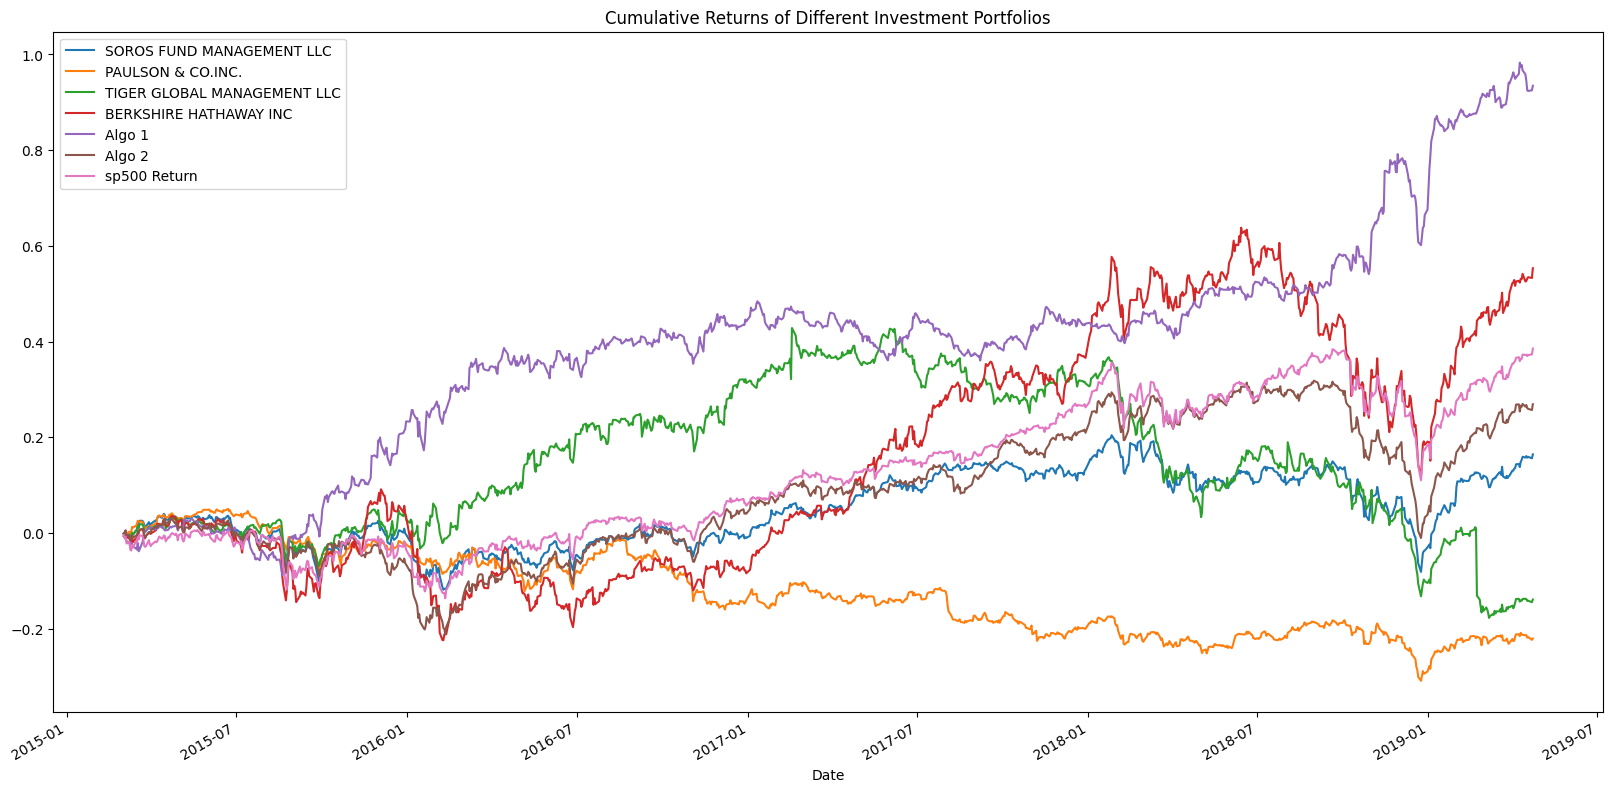

In [645]:
# Calculate cumulative returns of all portfolios
portfolio_names = combined_df.columns
returns = pd.DataFrame()
for name in portfolio_names:
    daily_returns = combined_df[name]
    cumulative_returns = (1 + daily_returns).cumprod() - 1
    returns[name] = cumulative_returns

display(returns.head())

# Plot cumulative returns
returns.plot(y=portfolio_names, figsize=(20,10),
              title='Cumulative Returns of Different Investment Portfolios')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

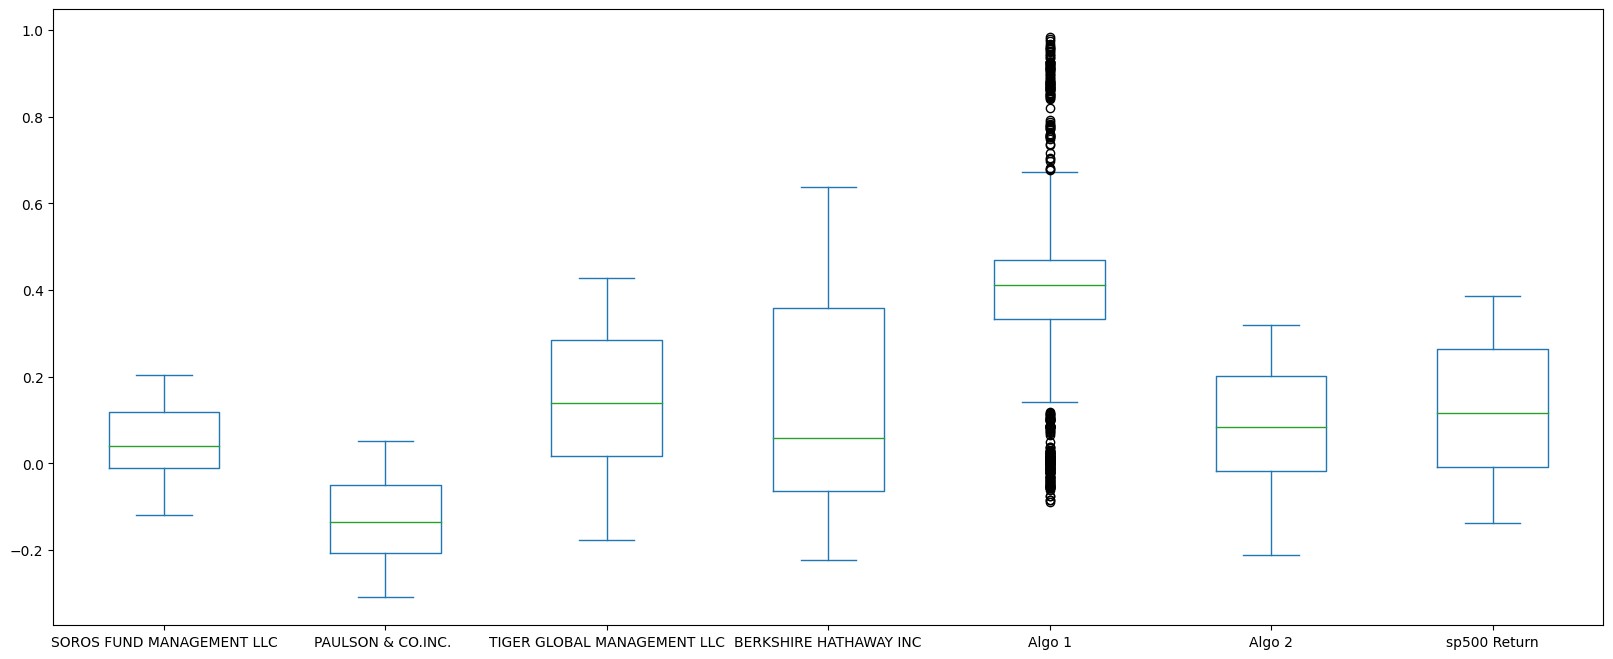

In [646]:
# Box plot to visually show risk
returns.plot.box(figsize=(20,8))


### Calculate Standard Deviations

In [647]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std = combined_df_std.sort_values(ascending=False).reset_index()
combined_df_std.rename(columns = {'index':'Portfolio', 0:'Risk (std)'}, inplace=True)
combined_df_std.set_index('Portfolio', inplace=True)
combined_df_std.head(10)


,Risk (std)
Portfolio,
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894
sp500 Return,0.008554
Algo 2,0.008342
SOROS FUND MANAGEMENT LLC,0.007895
Algo 1,0.007620
PAULSON & CO.INC.,0.007023


### Determine which portfolios are riskier than the S&P 500

In [648]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = combined_df_std.loc['sp500 Return']['Risk (std)']


# Determine which portfolios are riskier than the S&P 500
combined_df_std.where(combined_df_std['Risk (std)'] > sp500_risk).dropna()


,Risk (std)
Portfolio,
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894


### Calculate the Annualized Standard Deviation

In [649]:
# Calculate the annualized standard deviation (252 trading days)
annuualized_std = combined_df_std * np.sqrt(252)
annuualized_std.sort_values('Risk (std)', ascending=False)
annuualized_std.head(10)


,Risk (std)
Portfolio,
BERKSHIRE HATHAWAY INC,0.205077
TIGER GLOBAL MANAGEMENT LLC,0.172936
sp500 Return,0.135786
Algo 2,0.132430
SOROS FUND MANAGEMENT LLC,0.125335
Algo 1,0.120967
PAULSON & CO.INC.,0.111488


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   
2019-04-23                   0.004315            0.005695   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

<Axes: xlabel='Date'>

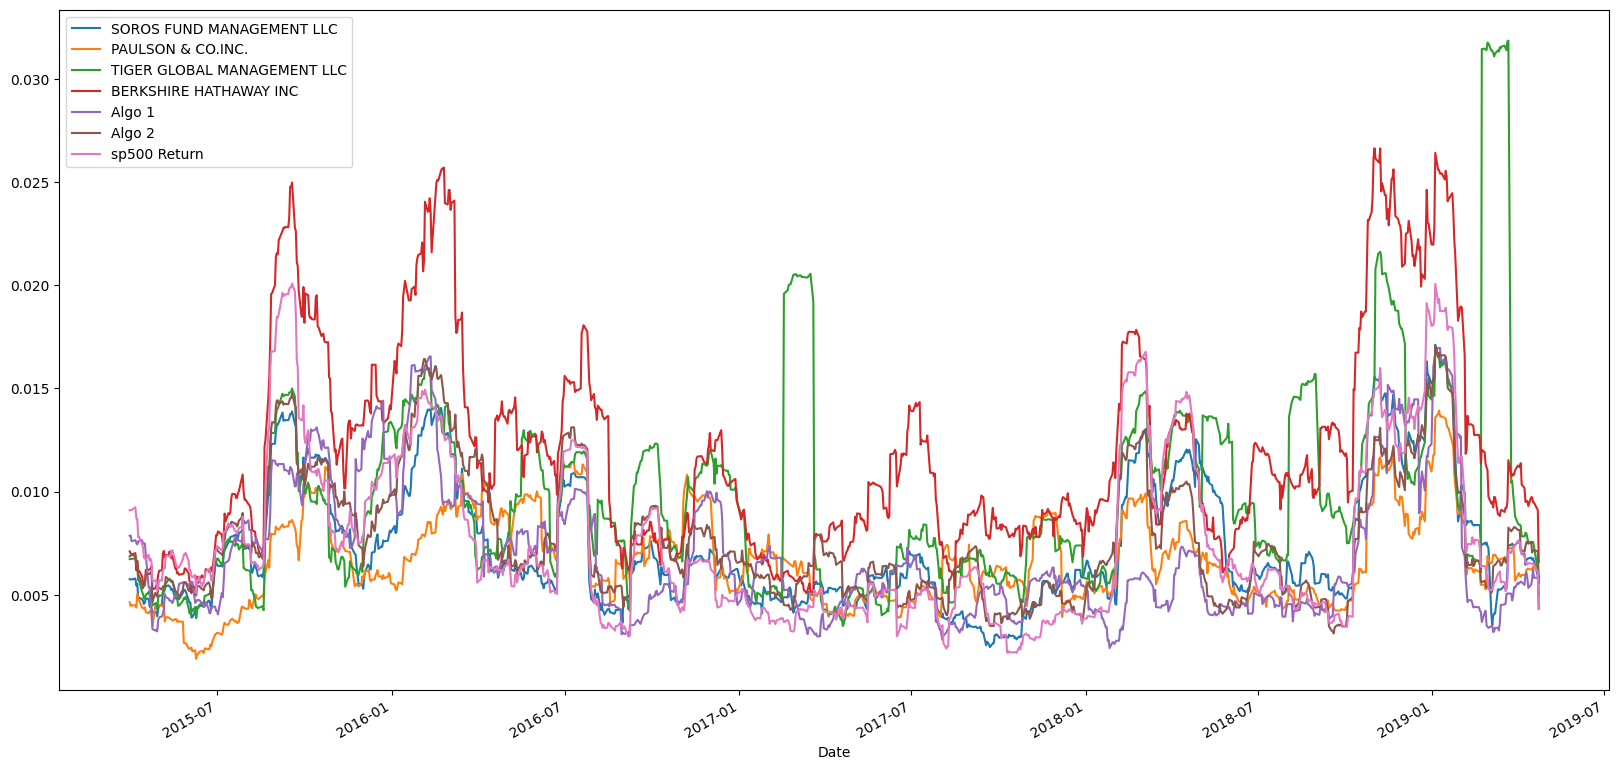

In [650]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
print(combined_df.rolling(window=21).std())

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
sp500 Return                                  0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

<Axes: >

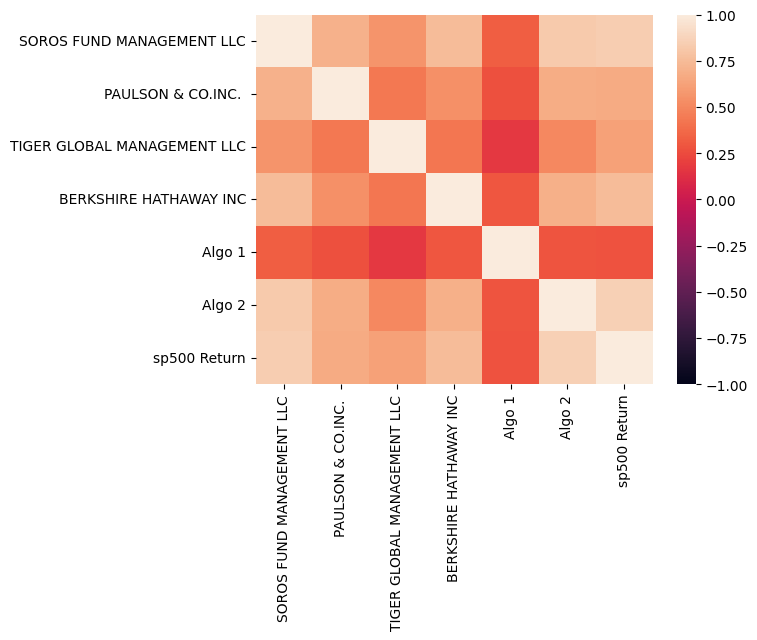

In [651]:
# Calculate the correlation
correlation = combined_df.corr()
print(correlation)

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

8.302834941861666e-05
7.316632424648712e-05
1.1347891297491692


<Axes: title={'center': 'Rolling 30-Day Beta of Berkshire Hathaway'}, xlabel='Date'>

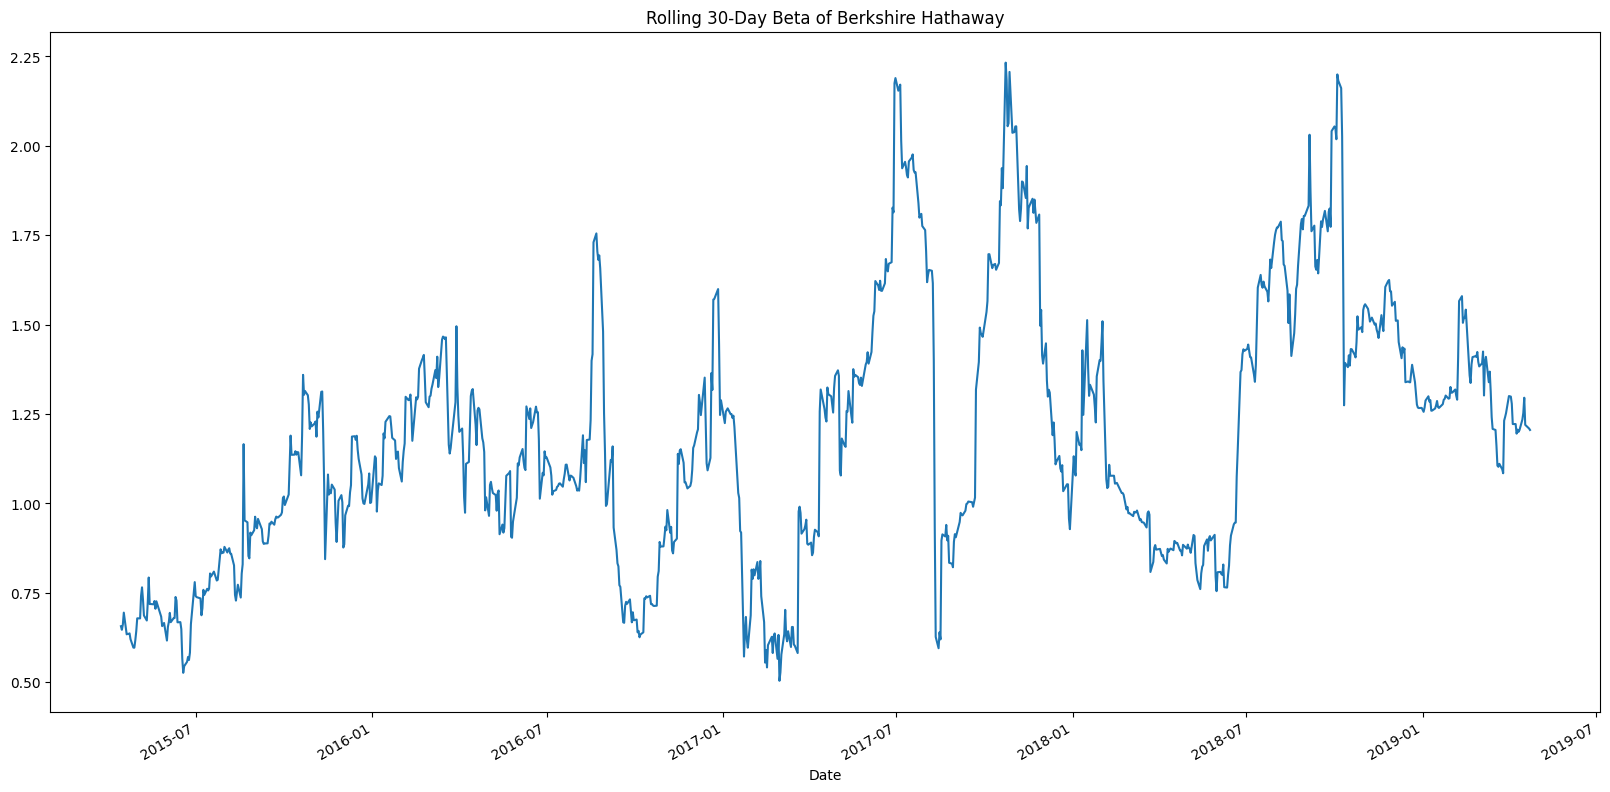

In [652]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['sp500 Return'])
print(covariance)

# Calculate variance of S&P 500
variance = combined_df['sp500 Return'].var()
print(variance)

# Computing beta
beta = covariance / variance
print(beta)

# Plot beta trend
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_df['sp500 Return'])
rolling_variance = combined_df['sp500 Return'].rolling(window=30).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Berkshire Hathaway')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

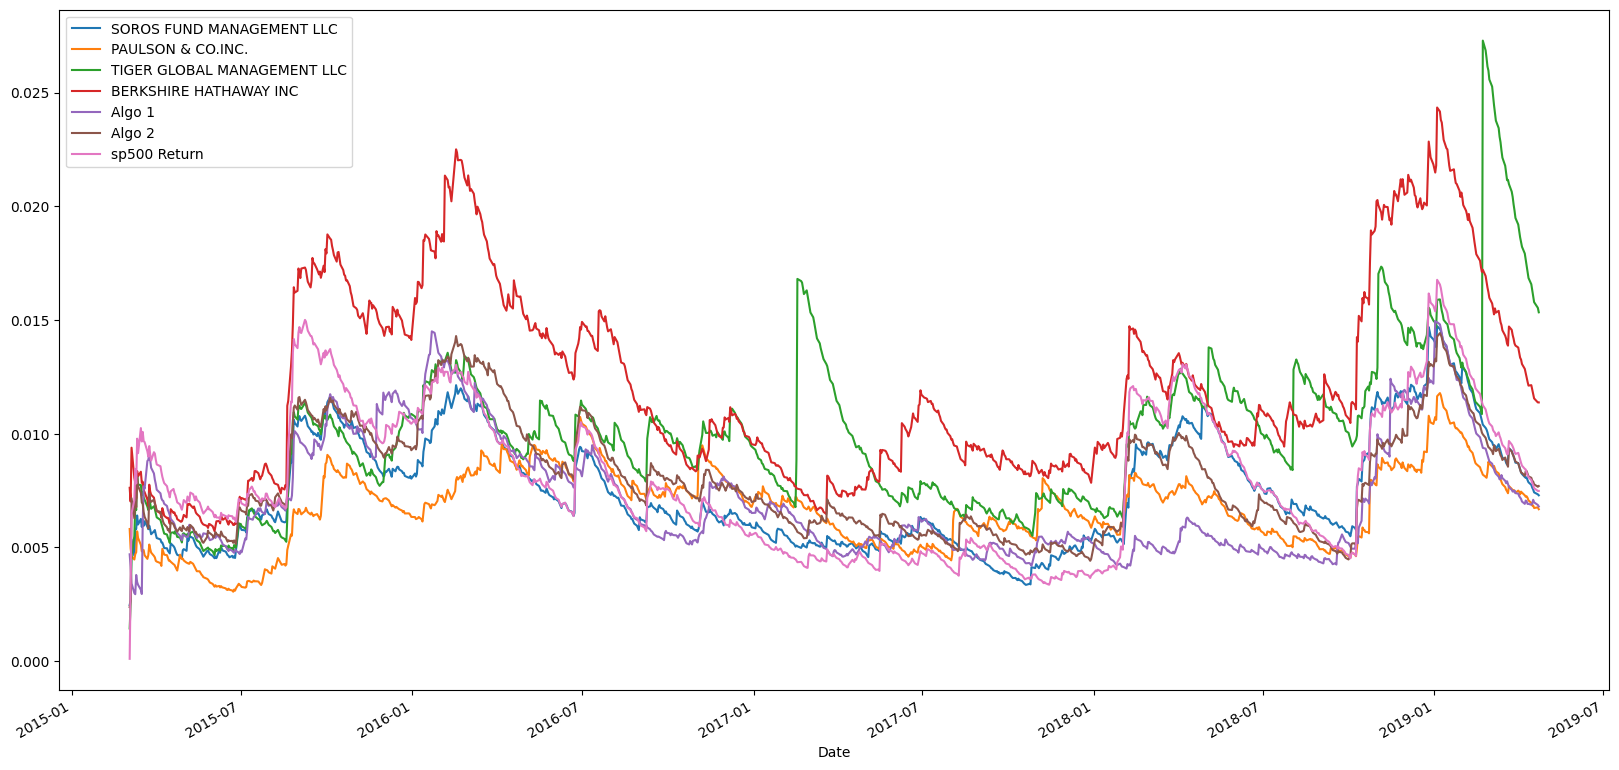

In [653]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [654]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean()*252) / (combined_df.std() * np.sqrt(252))
print(sharpe_ratio)


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500 Return                   0.648267
dtype: float64


<Axes: title={'center': 'Sharpe Ratios'}>

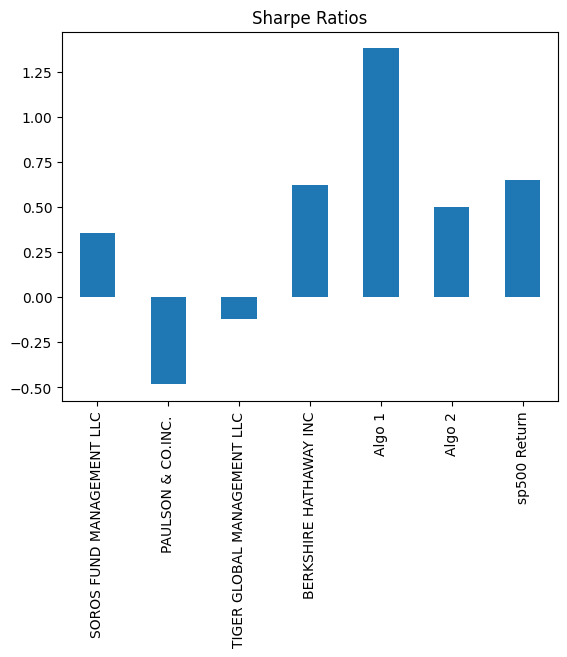

In [655]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

It does look like Algo 1 strategy outperforms the market and the whales because the sharpe ratio is the most positive. The algo's have the highest return to risk ratio, while the whales seem to have higher returns but also higher risk as well. This is what makes the whale portfolio less disadvantageous than the algo strategies.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [656]:
# Reading data from 1st stock
google_data = pd.read_csv(Path('../Resources/goog_historical.csv'))
google_data.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [657]:
# Reading data from 2nd stock
apple_data = pd.read_csv(Path('../Resources/aapl_historical.csv'))
apple_data.head()






,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [658]:
# Reading data from 3rd stock
cost_data = pd.read_csv(Path('../Resources/cost_historical.csv'))
cost_data.head()


,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [659]:
# Combine all stocks in a single DataFrame
combined_custom_df = pd.concat([google_data.iloc[:,1:], apple_data['NOCP'], cost_data['NOCP']], axis = 1, join='inner')
combined_custom_df.head()


,Trade DATE,NOCP,NOCP,NOCP
0,5/9/2019,1162.38,200.72,243.47
1,5/8/2019,1166.27,202.90,241.34
2,5/7/2019,1174.10,202.86,240.18
3,5/6/2019,1189.39,208.48,244.23
4,5/3/2019,1185.40,211.75,244.62


In [660]:
# Reset Date index
combined_custom_df.set_index(pd.to_datetime(combined_custom_df['Trade DATE'], infer_datetime_format=True), inplace=True)
combined_custom_df.sort_index(inplace=True)
combined_custom_df.head()


,Trade DATE,NOCP,NOCP,NOCP
Trade DATE,,,,
2018-05-11,5/11/2018,1098.26,188.59,195.76
2018-05-14,5/14/2018,1100.20,188.15,195.88
2018-05-15,5/15/2018,1079.23,186.44,195.48
2018-05-16,5/16/2018,1081.77,188.18,198.71
2018-05-17,5/17/2018,1078.59,186.99,199.60


In [661]:
# Reorganize portfolio data by having a column per symbol
combined_custom_df.drop(columns='Trade DATE', inplace=True)
combined_custom_df.columns = ['GOOG','AAPL','COST']
combined_custom_df.head()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [662]:
# Calculate daily returns
daily_returns = combined_custom_df.pct_change()
daily_returns.head()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [663]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = pd.DataFrame({'custom portfolio': daily_returns.dot(weights)})

# Display sample data

portfolio_return.head()


,custom portfolio
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [664]:
# Join your returns DataFrame to the original returns DataFrame
combined_all_df = pd.concat([combined_df, portfolio_return], axis = 1, join = 'inner')
combined_all_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return,custom portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [665]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_all_df.dropna(inplace=True)
combined_all_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return,custom portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [666]:
# Calculate the annualized `std`
combined_all_df_std = combined_all_df.std()
combined_all_df_std = combined_all_df_std.sort_values(ascending=False).reset_index()
combined_all_df_std.rename(columns = {'index':'Portfolio', 0:'Risk (std)'}, inplace=True)
combined_all_df_std.set_index('Portfolio', inplace=True)

annuualized_std = combined_all_df_std * np.sqrt(252)
annuualized_std.sort_values('Risk (std)', ascending=False)
annuualized_std.head(10)

,Risk (std)
Portfolio,
BERKSHIRE HATHAWAY INC,0.247155
TIGER GLOBAL MANAGEMENT LLC,0.232531
custom portfolio,0.211496
sp500 Return,0.152054
SOROS FUND MANAGEMENT LLC,0.146675
Algo 2,0.139556
Algo 1,0.133704
PAULSON & CO.INC.,0.116732


### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2018-05-14                        NaN                 NaN   
2018-05-15                        NaN                 NaN   
2018-05-16                        NaN                 NaN   
2018-05-17                        NaN                 NaN   
2018-05-18                        NaN                 NaN   
...                               ...                 ...   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   
2019-04-23                   0.004315            0.005695   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2018-05-14                          NaN                     NaN       NaN   
2018-05-15                          NaN                     NaN       NaN   
2018-05-16                          

<Axes: >

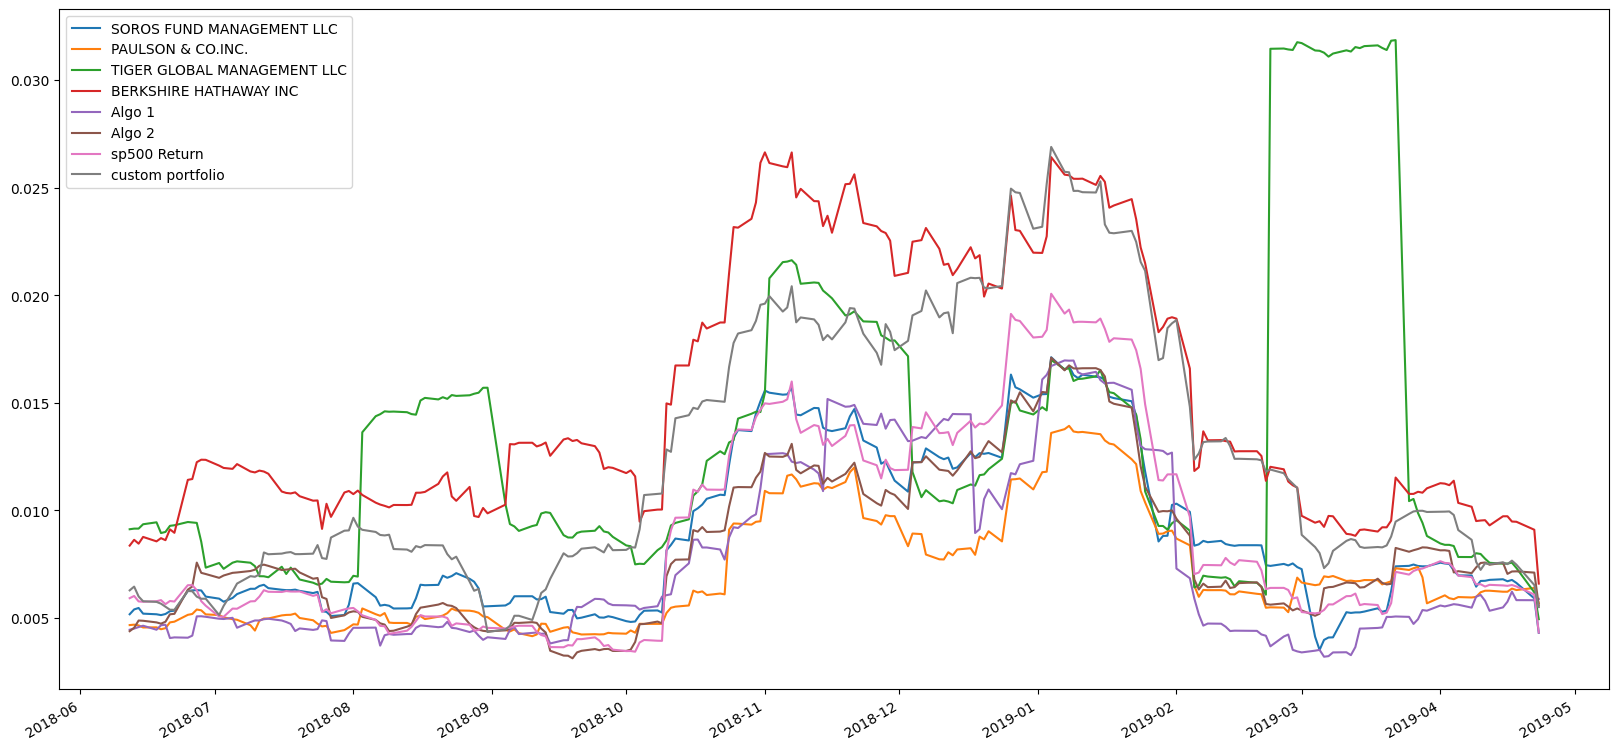

In [667]:
# Calculate rolling standard deviation
print(combined_all_df.rolling(window=21).std())

# Plot the rolling standard deviation
combined_all_df.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791962   
PAULSON & CO.INC.                             0.791962            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.478627            0.485375   
BERKSHIRE HATHAWAY INC                        0.816675            0.650758   
Algo 1                                        0.337826            0.361301   
Algo 2                                        0.862846            0.783656   
sp500 Return                                  0.876981            0.766680   
custom portfolio                              0.733250            0.644210   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.478627   
PAULSON & CO.INC.                               0.485375   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.325457 

<Axes: >

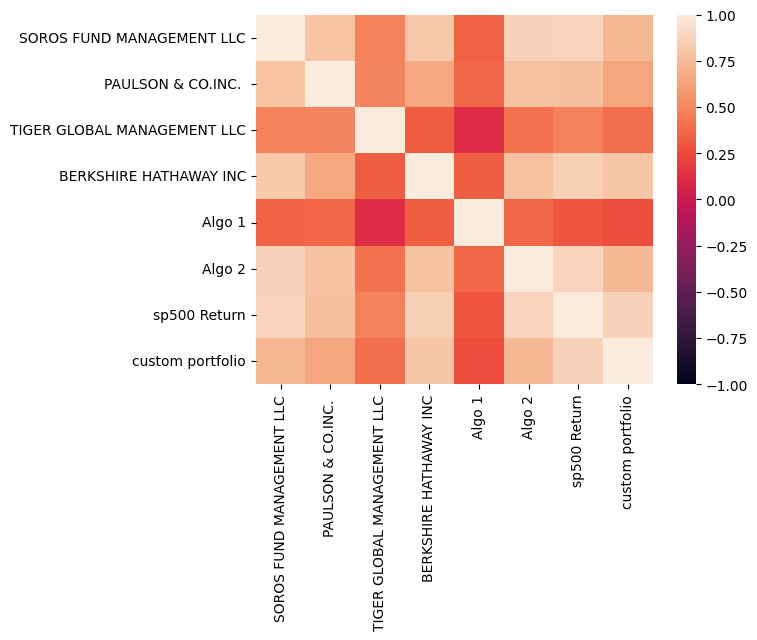

In [668]:
# Calculate and plot the correlation
correlation = combined_all_df.corr()
print(correlation)

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Custom Beta'}>

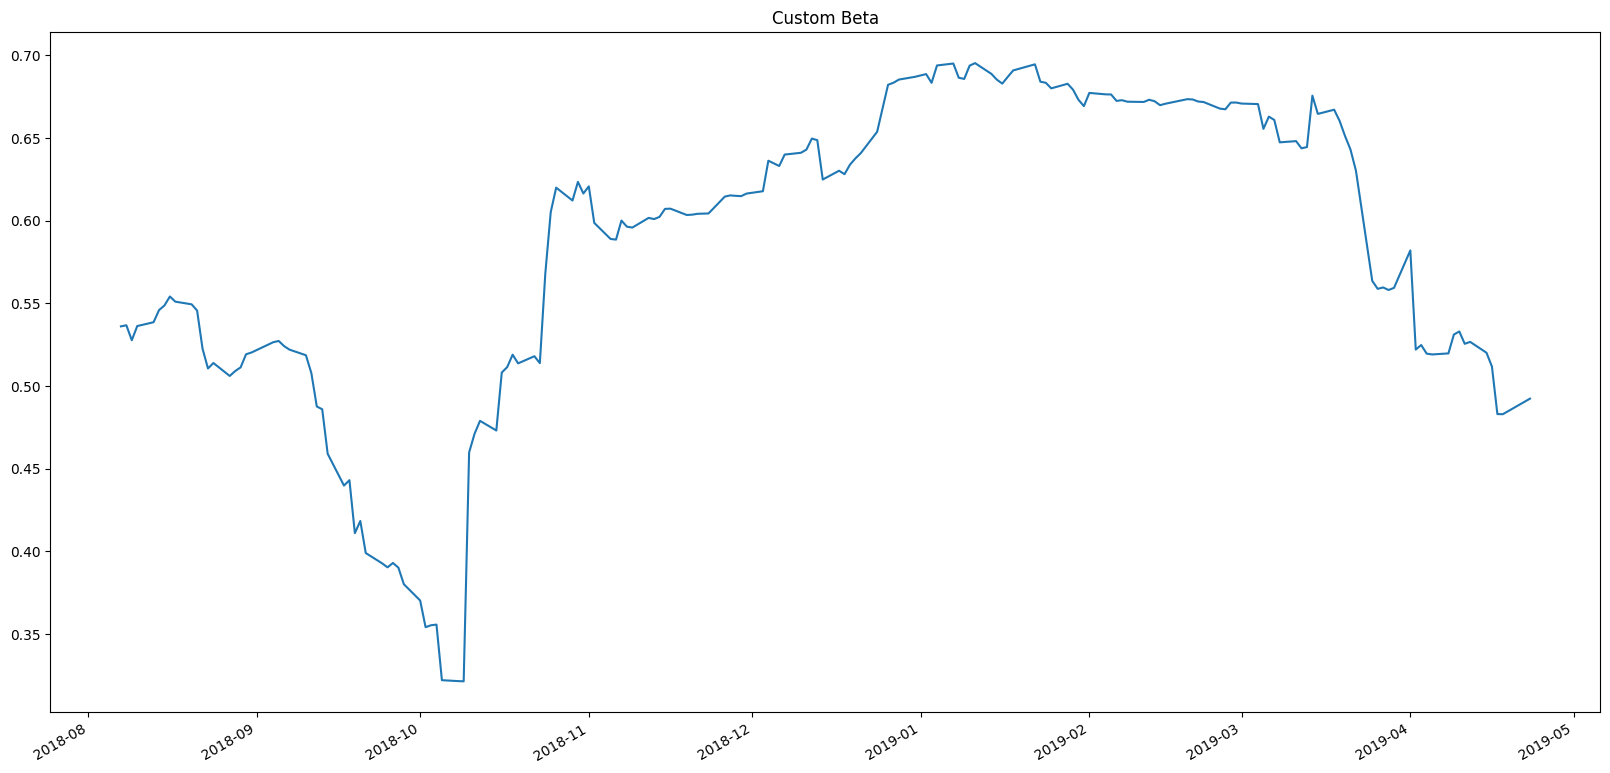

In [669]:
# Calculate and plot Beta
rolling_variance = combined_all_df['custom portfolio'].rolling(window=60).var()
rolling_covariance = combined_all_df['custom portfolio'].rolling(window=60).cov(combined_all_df['sp500 Return'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Custom Beta')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [670]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_all = (combined_all_df.mean() * 252) / (combined_all_df.std() * np.sqrt(252))
print(sharpe_ratio_all)


SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
sp500 Return                   0.584820
custom portfolio               0.933123
dtype: float64


<Axes: title={'center': 'Sharpe Ratios'}>

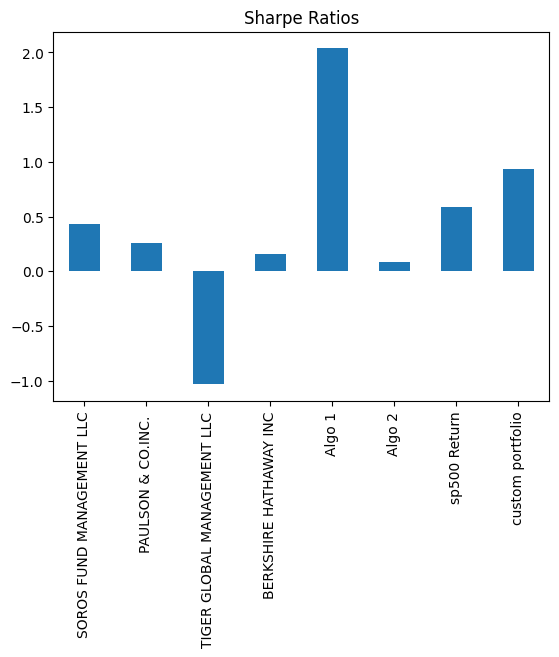

In [671]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_all.plot(kind='bar', title='Sharpe Ratios')



### How does your portfolio do?

Write your answer here!

The custom portfolio does better than the S&P500, and most of the other whales but does worse than the algo 1 strategy.